**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



**Set global variable**

In [2]:
## init: region folder
vec = c("fcc_astarr_macs_input_overlap", "fcc_astarr_macs_input_union")
names(vec) = vec

VEC_TXT_FOLDER = vec
for (txt in vec) {cat(txt, "\n")}

fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


**Check input files**

In [3]:
txt_folder = VEC_TXT_FOLDER[1]
txt_fdiry  = file.path(FD_RES, "region_coverage_fcc_score", txt_folder, "summary")
txt_fname  = "region.coverage.score.fcc.*.tsv"
txt_fglob  = file.path(txt_fdiry, txt_fname)

vec = Sys.glob(txt_fglob)
for (txt in vec) {cat(txt, "\n")}

/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_coverage_fcc_score/fcc_astarr_macs_input_overlap/summary/region.coverage.score.fcc.final.tsv 
/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_coverage_fcc_score/fcc_astarr_macs_input_overlap/summary/region.coverage.score.fcc.test.tsv 
/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_coverage_fcc_score/fcc_astarr_macs_input_overlap/summary/region.coverage.score.fcc.total.tsv 


## Import data

In [29]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### set file directory
    txt_fdiry  = file.path(
        FD_RES, "region_coverage_fcc_score", 
        txt_folder, 
        "summary"
    )
    txt_fname = "region.coverage.score.fcc.final.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})

### assign and show
lst_dat_region_score_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 432928     11

$fcc_astarr_macs_input_union
[1] 639718     11



Chrom,ChromStart,ChromEnd,Region,Score,Zcore,Score_Label,Zcore_Label,Assay_Folder,Assay_Group,Assay_Label
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
chr1,10038,10405,chr1:10038-10405,-2.23485265,-3.5573621,Log2FC,Scale(Log2FC),STARR_ATAC_K562_Reddy_KS91,ASTARR_KS91,ASTARR
chr1,14282,14614,chr1:14282-14614,0.03179044,0.0361388,Log2FC,Scale(Log2FC),STARR_ATAC_K562_Reddy_KS91,ASTARR_KS91,ASTARR
chr1,16025,16338,chr1:16025-16338,-1.33934060,-2.1376311,Log2FC,Scale(Log2FC),STARR_ATAC_K562_Reddy_KS91,ASTARR_KS91,ASTARR


**Check: count**

In [30]:
lst = lst_dat_region_score_import
lst = lapply(lst, function(dat){
    res = table(dat$Assay_Group, dnn = "Assay")
    dat = as.data.frame(res)
    return(dat)
})
dat = bind_rows(lst, .id = "Folder")
dat = dat %>% tidyr::spread(Folder, Freq)
dat

Assay,fcc_astarr_macs_input_overlap,fcc_astarr_macs_input_union
<fct>,<int>,<int>
ASTARR_KS91,150040,246850
CRISPRi-Growth,72743,80288
CRISPRi-HCRFF,925,1330
LMPRA,61478,68497
TMPRA,1148,1722
WSTARR,146594,241031


In [32]:
lst = lst_dat_region_score_import
lst = lapply(lst, function(dat){
    res = table(dat$Assay_Label, dat$Score_Label, dnn = c("Assay_Label", "Score_Label"))
    dat = as.data.frame(res)
    return(dat)
})
dat = bind_rows(lst, .id = "Folder")
dat = dat %>% 
    dplyr::filter(Freq != 0) %>%
    tidyr::spread(Folder, Freq)
dat

Assay_Label,Score_Label,fcc_astarr_macs_input_overlap,fcc_astarr_macs_input_union
<fct>,<fct>,<int>,<int>
ASTARR,Log2FC,150040,246850
CRISPRi-Growth,Mean(ZScore),72743,80288
CRISPRi-HCRFF,Mean(ZScore),925,1330
LMPRA,Log2FC scaled by Neg.Ctrl,61478,68497
TMPRA,Log2FC,1148,1722
WSTARR,Log2FC,146594,241031


In [33]:
lst = lst_dat_region_score_import
lst = lapply(lst, function(dat){
    res = table(dat$Assay_Label, dat$Zcore_Label, dnn = c("Assay_Label", "Zcore_Label"))
    dat = as.data.frame(res)
    return(dat)
})
dat = bind_rows(lst, .id = "Folder")
dat = dat %>% 
    dplyr::filter(Freq != 0) %>%
    tidyr::spread(Folder, Freq)
dat

Assay_Label,Zcore_Label,fcc_astarr_macs_input_overlap,fcc_astarr_macs_input_union
<fct>,<fct>,<int>,<int>
ASTARR,Scale(Log2FC),150040,246850
CRISPRi-Growth,Mean(ZScore),72743,80288
CRISPRi-HCRFF,Mean(ZScore),925,1330
LMPRA,Scale(Log2FC),61478,68497
TMPRA,Scale(Log2FC),1148,1722
WSTARR,Scale(Log2FC),146594,241031


## Arrange tables

In [34]:
idx = "fcc_astarr_macs_input_union"
lst = lst_dat_region_score_import
dat = lst[[idx]]

dat_region_score_import = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 639718     11


Chrom,ChromStart,ChromEnd,Region,Score,Zcore,Score_Label,Zcore_Label,Assay_Folder,Assay_Group,Assay_Label
chr1,10015,10442,chr1:10015-10442,-2.1177891,-3.7814427,Log2FC,Scale(Log2FC),STARR_ATAC_K562_Reddy_KS91,ASTARR_KS91,ASTARR
chr1,14253,14645,chr1:14253-14645,0.3206124,0.5653917,Log2FC,Scale(Log2FC),STARR_ATAC_K562_Reddy_KS91,ASTARR_KS91,ASTARR
chr1,16015,16477,chr1:16015-16477,-1.1744478,-2.0997884,Log2FC,Scale(Log2FC),STARR_ATAC_K562_Reddy_KS91,ASTARR_KS91,ASTARR


In [37]:
dat = dat_region_score_import
lst = split(dat$Zcore, dat$Assay_Label)

lst_vec_num_score = lst
print(names(lst))

[1] "ASTARR"         "CRISPRi-Growth" "CRISPRi-HCRFF"  "LMPRA"         
[5] "TMPRA"          "WSTARR"        


Warning message:
“Removed 14 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


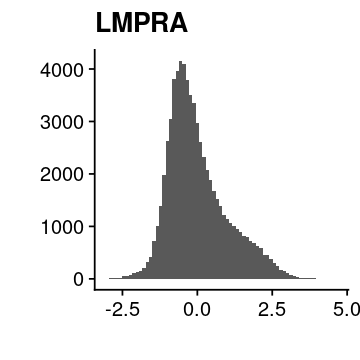

In [38]:
lst = lapply(vec_txt_assay, function(txt_assay){
    ### get scores
    vec_num_score = lst_vec_num_score[[txt_assay]]
    dat_num_score = data.frame(Score = vec_num_score)

    ### set plot range
    num_prob = 0.0001
    vec_num_range = quantile(
        vec_num_score, 
        probs = c(num_prob, 1-num_prob)
    )
    
    ### generate plot
    gpt = ggplot(dat_num_score, aes(x=Score)) + 
        geom_histogram(bins = 70) + 
        labs(x="", y="", title=txt_assay) +
        theme_cowplot() +
        xlim(vec_num_range)
})

### assign and show
lst_gpt_hist_assay = lst

gpt = lst[[4]]

options(repr.plot.height=3, repr.plot.width=3)
print(gpt)

In [23]:
dat = dat_region_score_import
lst = split(dat$Zcore, dat$Assay_Label)

lst_vec_num_score = lst
print(names(lst))

[1] "ASTARR"         "CRISPRi-Growth" "CRISPRi-HCRFF"  "LMPRA"         
[5] "TMPRA"          "WSTARR"        


Warning message:
“Removed 14 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


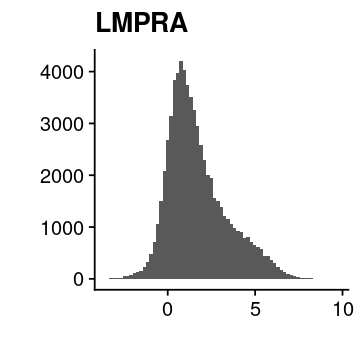

In [24]:
lst = lapply(vec_txt_assay, function(txt_assay){
    ### get scores
    vec_num_score = lst_vec_num_score[[txt_assay]]
    dat_num_score = data.frame(Score = vec_num_score)

    ### set plot range
    num_prob = 0.0001
    vec_num_range = quantile(
        vec_num_score, 
        probs = c(num_prob, 1-num_prob)
    )
    
    ### generate plot
    gpt = ggplot(dat_num_score, aes(x=Score)) + 
        geom_histogram(bins = 70) + 
        labs(x="", y="", title=txt_assay) +
        theme_cowplot() +
        xlim(vec_num_range)
})

### assign and show
lst_gpt_hist_assay = lst

gpt = lst[[4]]

options(repr.plot.height=3, repr.plot.width=3)
print(gpt)

## Explore: Density plot

In [17]:
vec = c("ASTARR", "WSTARR", "TMPRA", "LMPRA", "CRISPRi-HCRFF", "CRISPRi-Growth")
names(vec) = vec

vec_txt_assay = vec
print(length(vec))
print(vec)

[1] 6
          ASTARR           WSTARR            TMPRA            LMPRA 
        "ASTARR"         "WSTARR"          "TMPRA"          "LMPRA" 
   CRISPRi-HCRFF   CRISPRi-Growth 
 "CRISPRi-HCRFF" "CRISPRi-Growth" 


Warning message:
“Removed 50 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


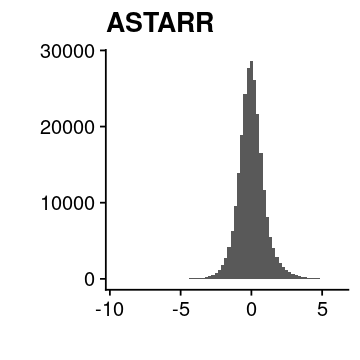

In [18]:
lst = lapply(vec_txt_assay, function(txt_assay){
    ### get scores
    vec_num_score = lst_vec_num_score[[txt_assay]]
    dat_num_score = data.frame(Score = vec_num_score)

    ### set plot range
    num_prob = 0.0001
    vec_num_range = quantile(
        vec_num_score, 
        probs = c(num_prob, 1-num_prob)
    )
    
    ### generate plot
    gpt = ggplot(dat_num_score, aes(x=Score)) + 
        geom_histogram(bins = 70) + 
        labs(x="", y="", title=txt_assay) +
        theme_cowplot() +
        xlim(vec_num_range)
})

### assign and show
lst_gpt_hist_assay = lst

gpt = lst[[1]]

options(repr.plot.height=3, repr.plot.width=3)
print(gpt)

Warning message:
“Removed 50 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”
Warning message:
“Removed 50 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”
Warning message:
“Removed 14 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values or values outside 

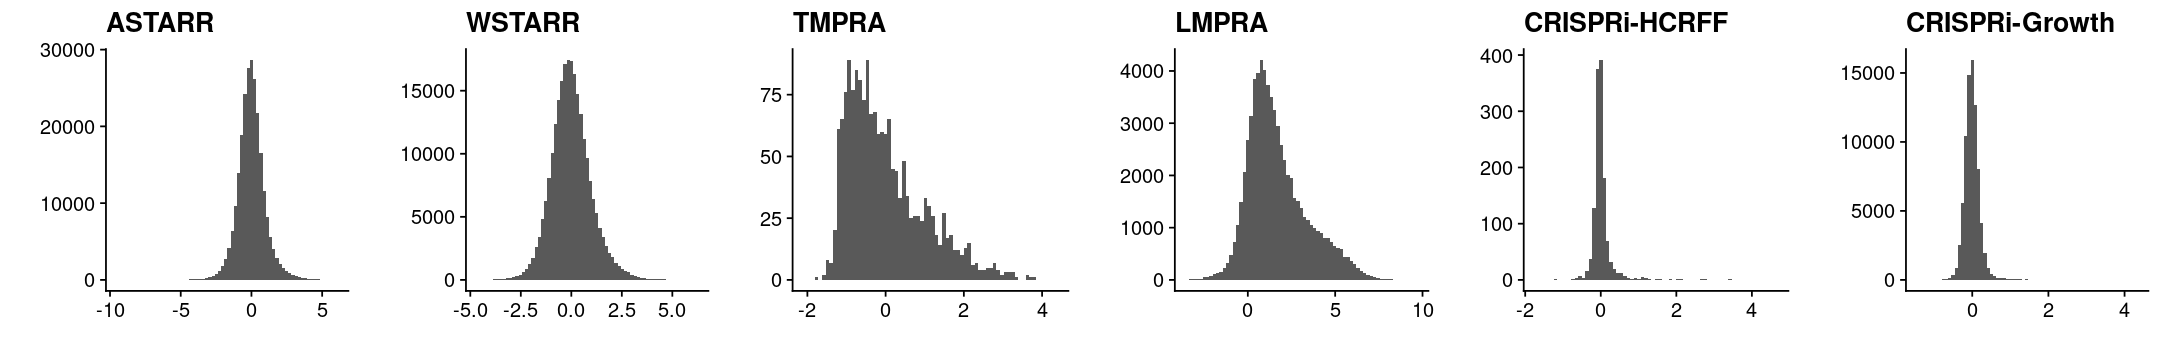

In [19]:
### arrange plots
lst = lst_gpt_hist_assay

### generate plot
plt = plot_grid(plotlist = lst, nrow = 1)

### assign and show
plt_hist_assay = plt
options(repr.plot.height=3*1, repr.plot.width=3*6)
print(plt)

Warning message:
“Removed 50 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”
Warning message:
“Removed 50 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”
Warning message:
“Removed 14 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values or values outside 

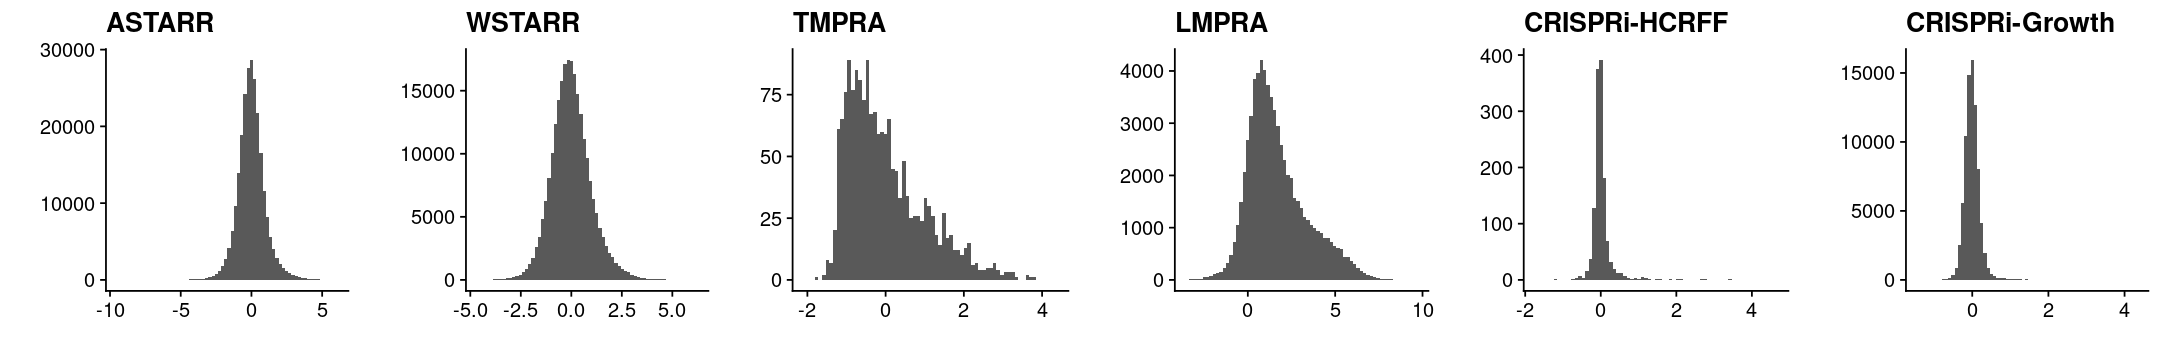

In [9]:
### arrange plots
lst = lst_gpt_hist_assay

### generate plot
plt = plot_grid(plotlist = lst, nrow = 1)

### assign and show
plt_hist_assay = plt
options(repr.plot.height=3*1, repr.plot.width=3*6)
print(plt)

## Save plots

**Save plot grid**

In [10]:
plt_export = plt_hist_assay
txt_export = "fig.region_coverage_fcc.histogram.zscore.grid"

txt_fdiry = "./"
txt_fname = paste(txt_export, "png", sep = ".")
txt_fpath = file.path(txt_fdiry, txt_fname)
ggsave(txt_fpath, plt_export, height = 3*1, width = 3*6, units = "in")

txt_fdiry = "./"
txt_fname = paste(txt_export, "svg", sep = ".")
txt_fpath = file.path(txt_fdiry, txt_fname)
ggsave(txt_fpath, plt_export, height = 3*1, width = 3*6, units = "in")

**Save each plot**

In [11]:
lst = lst_gpt_hist_assay
for (idx in names(lst)){
    ### get plot
    txt = str_replace_all(idx, "-", "_")
    gpt = lst[[idx]]
    
    ### show progress
    cat(idx, "\n")
    cat(txt, "\n")
    cat("\n")

    ### save plot
    txt_fdiry = "."
    txt_fname = paste0("fig.region_coverage_fcc.histogram.zscore.", txt, ".png")
    txt_fpath = file.path(txt_fdiry, txt_fname)
    
    suppressWarnings(ggsave(txt_fpath, gpt, height = 3, width = 3, units = "in"))
}

ASTARR 
ASTARR 

WSTARR 
WSTARR 

TMPRA 
TMPRA 

LMPRA 
LMPRA 

CRISPRi-HCRFF 
CRISPRi_HCRFF 

CRISPRi-Growth 
CRISPRi_Growth 

